In [443]:
import pandas as pd
import numpy as np
from datetime import datetime

In [374]:
bost_df=pd.read_csv('scrape_booli_2022-07-19.csv',index_col=False)

- Assess  
- Define  
- Clean  
- Analyze  
- Visualize  



Assess:
- Alla kolumner kan ha bättre namn   

unnamed:
- [X] Ta bort index då det inte behövs, unnamed   

b_size:
-  delas till 2 kolumner
 - ant_rum
 - bost_stlk_m2

b_price:  
- ta bort kr i b-price
- gör om datatyp

b_pr_m2 :  
- ta bort kr/m2 på alla hus

b_sale_date:
gör om till date_time






In [375]:
bost_df.head()

,Unnamed: 0,b_loc,b_size,b_price,b_pr_m2,b_sale_rslt,b_sale_date
0,0,Kärleksstigen 28,"6 rum, 161 m²",2 500 000 kr,15 500 kr/m²,0.0,2022-07-15
1,1,Hagagatan 7,"4 rum, 122 m²",1 100 000 kr,9 000 kr/m²,-7.9,2022-07-14
2,2,Uddabergsvägen 15,"4 rum, 119 m²",4 680 000 kr,39 300 kr/m²,4.1,2022-07-13
3,3,Lerdala Åbod gatan,"2 rum, 73 m²",1 650 000 kr,22 600 kr/m²,-2.1,2022-07-12
4,4,Rönnbärsvägen 21,"7 rum, 164 m²",2 300 000 kr,14 000 kr/m²,4.8,2022-07-12


**Define** 
Ta bort column 0
<!-- bost_df.reset_index() -->
Code :

In [376]:
#Drop column 0
bost_df.drop(bost_df.iloc[:,0:1],axis=1,inplace=True)
# Osäker på om denna behövs:
#bost_df.reset_index()

Test:

**Define:**  
    Dela på antal rum och kvm  
    Code:

In [377]:
#dela på b_size
bost_df[['ant_rum','kvm']]=bost_df.b_size.str.split(',',expand=True)

In [378]:
#Drop column b_size
bost_df.drop(['b_size'],axis=1,inplace=True)

In [379]:
bost_df.head()

,b_loc,b_price,b_pr_m2,b_sale_rslt,b_sale_date,ant_rum,kvm
0,Kärleksstigen 28,2 500 000 kr,15 500 kr/m²,0.0,2022-07-15,6 rum,161 m²
1,Hagagatan 7,1 100 000 kr,9 000 kr/m²,-7.9,2022-07-14,4 rum,122 m²
2,Uddabergsvägen 15,4 680 000 kr,39 300 kr/m²,4.1,2022-07-13,4 rum,119 m²
3,Lerdala Åbod gatan,1 650 000 kr,22 600 kr/m²,-2.1,2022-07-12,2 rum,73 m²
4,Rönnbärsvägen 21,2 300 000 kr,14 000 kr/m²,4.8,2022-07-12,7 rum,164 m²


**Define**  
Remove ' m²' från kvm
Remove kr/m² från b_pr_m2
 
Code:

In [380]:
bost_df.rename(columns = {'b_price':'b_price_kr','kvm':'kvm_m2','b_pr_m2':'b_price_m2_kr','ant_rum':'amt_room'}, inplace = True)

In [382]:
bost_df.head(1)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2 500 000 kr,15 500 kr/m²,0.0,2022-07-15,6 rum,161 m²


In [383]:
# remove m2 from kvm kolumn
bost_df.kvm_m2=bost_df.kvm_m2.str.replace(' m²','')

In [384]:
#remove kr/m2 from .b_pr_m2
bost_df.b_price_m2_kr=bost_df.b_price_m2_kr.str.replace(' kr/m²','')

In [385]:
bost_df.b_price_kr=bost_df.b_price_kr.str.replace(' kr','')

In [386]:
bost_df.amt_room=bost_df.amt_room.str.replace(' rum','')

In [387]:
bost_df.head()

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2 500 000,15 500,0.0,2022-07-15,6,161
1,Hagagatan 7,1 100 000,9 000,-7.9,2022-07-14,4,122
2,Uddabergsvägen 15,4 680 000,39 300,4.1,2022-07-13,4,119
3,Lerdala Åbod gatan,1 650 000,22 600,-2.1,2022-07-12,2,73
4,Rönnbärsvägen 21,2 300 000,14 000,4.8,2022-07-12,7,164


In [372]:
# DENNA KANSKE MÅSTE VARA KVAR!
#bost_df['kvm_m2']=bost_df.b_size_m2.str.split(',',expand=True)[1].str.replace(' m²','')

### Fix Antal rum

In [388]:
bost_df['amt_room']=bost_df['amt_room'].replace('None',np.nan)

In [390]:
bost_df.amt_room.dropna()

0      6
1      4
2      4
3      2
4      7
      ..
156    6
162    4
163    6
164    5
173    6
Name: amt_room, Length: 74, dtype: object

Convert to integers ,
problems to do cast to int from string

In [392]:
bost_df['amt_room']=bost_df['amt_room'].str.strip()

Try to replace NaN to -1 istället för att kunna konvertera dessa till int

In [394]:
bost_df.amt_room=bost_df.amt_room.replace(np.nan,-1)
#bost_df.replace(np.nan, -1)

In [402]:
bost_df.amt_room.sample()

14    6
Name: amt_room, dtype: object

In [404]:
# make string = int 
bost_df.amt_room=bost_df.amt_room.astype('int')

In [405]:
bost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   b_loc          175 non-null    object 
 1   b_price_kr     175 non-null    object 
 2   b_price_m2_kr  175 non-null    object 
 3   b_sale_rslt    175 non-null    float64
 4   b_sale_date    175 non-null    object 
 5   amt_room       175 non-null    int32  
 6   kvm_m2         175 non-null    object 
dtypes: float64(1), int32(1), object(5)
memory usage: 9.0+ KB


problem med mellanslag i bost_pris, måste ordnas innan konvertering

### Fix b_price_kr

In [408]:
#Remove mellanslag i b_price_kr
bost_df['b_price_kr']=bost_df['b_price_kr'].str.strip()
bost_df['b_price_kr']=bost_df['b_price_kr'].str.replace(' ','')

In [409]:
bost_df['b_price_kr']

0      2500000
1      1100000
2      4680000
3      1650000
4      2300000
        ...   
170    5100000
171    2350000
172    2500000
173     950000
174    2600000
Name: b_price_kr, Length: 175, dtype: object

In [410]:
#Cast b_price_kr to int
bost_df['b_price_kr']=bost_df['b_price_kr'].astype(int)

In [411]:
bost_df.head()

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2500000,15 500,0.0,2022-07-15,6,161
1,Hagagatan 7,1100000,9 000,-7.9,2022-07-14,4,122
2,Uddabergsvägen 15,4680000,39 300,4.1,2022-07-13,4,119
3,Lerdala Åbod gatan,1650000,22 600,-2.1,2022-07-12,2,73
4,Rönnbärsvägen 21,2300000,14 000,4.8,2022-07-12,7,164


### Fix datetime

In [412]:
bost_df['b_sale_date']=pd.to_datetime(bost_df['b_sale_date'])

### Fix kvm_m2

In [414]:
bost_df['kvm_m2']=bost_df['kvm_m2'].str.replace('m²','')

In [415]:
bost_df['kvm_m2']=bost_df['kvm_m2'].str.replace('½','')

In [428]:
bost_df['kvm_m2'].sample()

66     197
Name: kvm_m2, dtype: object

In [429]:
bost_df['kvm_m2']=bost_df['kvm_m2'].astype(int)

In [431]:
bost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   b_loc          175 non-null    object        
 1   b_price_kr     175 non-null    int32         
 2   b_price_m2_kr  175 non-null    object        
 3   b_sale_rslt    175 non-null    float64       
 4   b_sale_date    175 non-null    datetime64[ns]
 5   amt_room       175 non-null    int32         
 6   kvm_m2         175 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(2)
memory usage: 7.6+ KB


In [437]:
#remove blanks
bost_df['b_price_m2_kr']=bost_df['b_price_m2_kr'].str.replace(' ','')

In [438]:
bost_df['b_price_m2_kr']=bost_df['b_price_m2_kr'].astype(int)
##bost_df['kv_m']=bost_df['kv_m'].str.extractall('(\d+)').unstack().astype(int)

In [440]:
bost_df.dtypes

b_loc                    object
b_price_kr                int32
b_price_m2_kr             int32
b_sale_rslt             float64
b_sale_date      datetime64[ns]
amt_room                  int32
kvm_m2                    int32
dtype: object

In [441]:
bost_df.head(3)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2
0,Kärleksstigen 28,2500000,15500,0.0,2022-07-15,6,161
1,Hagagatan 7,1100000,9000,-7.9,2022-07-14,4,122
2,Uddabergsvägen 15,4680000,39300,4.1,2022-07-13,4,119


#### Save finished wrangled file to new CSV
## Move this line below , when all is finished

In [461]:
now=datetime.now()
dt=now.strftime("%Y_%m_%d")
bost_df.to_csv(f'wrangled_bost_p{dt}.csv',sep=',',encoding='utf-8')

In [142]:
#### Beräkna utgångspriset på fastigheten
# enligt rutan nedan kan man inte använda procent talet direkt utan måste konvertera detta först så att det passar beräkningen.

In [463]:
#make column ack_calk_res
bost_df['ack_calc_res']=bost_df['b_sale_rslt']*0.01

In [465]:
bost_df.head()


,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res
0,Kärleksstigen 28,2500000,15500,0.0,2022-07-15,6,161,0.000
1,Hagagatan 7,1100000,9000,-7.9,2022-07-14,4,122,-0.079
2,Uddabergsvägen 15,4680000,39300,4.1,2022-07-13,4,119,0.041
3,Lerdala Åbod gatan,1650000,22600,-2.1,2022-07-12,2,73,-0.021
4,Rönnbärsvägen 21,2300000,14000,4.8,2022-07-12,7,164,0.048


#### calculate the starting price for houses 

In [466]:
for item in bost_df.ack_calc_res:
    
    if item < 0:
        bost_df['starting_price']=(bost_df.b_price_kr/(1-bost_df.ack_calc_res)).round()
    else:
        bost_df['starting_price']=(bost_df.b_price_kr / (1+bost_df.ack_calc_res))
        

In [468]:
bost_df.starting_price.astype(int)

0      2500000
1      1194353
2      4495677
3      1685393
4      2194656
        ...   
170    4501323
171    1644506
172    2495009
173     950000
174    2394106
Name: starting_price, Length: 175, dtype: int32

In [472]:
bost_df.head(3)

,b_loc,b_price_kr,b_price_m2_kr,b_sale_rslt,b_sale_date,amt_room,kvm_m2,ack_calc_res,starting_price
0,Kärleksstigen 28,2500000,15500,0.0,2022-07-15,6,161,0.000,2.500000e+06
1,Hagagatan 7,1100000,9000,-7.9,2022-07-14,4,122,-0.079,1.194354e+06
2,Uddabergsvägen 15,4680000,39300,4.1,2022-07-13,4,119,0.041,4.495677e+06


In [277]:
bost_df.sample(10)

,b_loc,b_price_kr,b_sale_rslt,b_sale_date,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
59,Norrskensvägen 8,1300000,8.8,2022-05-23,4,12000,108,0.088,1.194853e+06
14,Västerleden 13,2000000,-8.0,2022-07-01,6,19400,103,-0.080,2.173913e+06
35,Bankälla Tomten 2,1385000,0.0,2022-06-09,4,13700,101,0.000,1.385000e+06
108,Kamomillvägen 12,4450000,-3.0,2022-03-31,5,29300,152,-0.030,4.587629e+06
143,Åkervägen 26,3200000,6.8,2022-02-18,-1,44400,72,0.068,2.996255e+06
8,Sjogerstad Mariedal,2550000,-8.8,2022-07-08,4,22200,115,-0.088,2.796053e+06
136,Lingonstigen 33,4900000,-2.0,2022-02-28,-1,45800,107,-0.020,5.000000e+06
29,Esbjörntorp Storegården 1,2800000,-6.0,2022-06-15,-1,17000,165,-0.060,2.978723e+06
93,Stjärnvägen 13,3800000,-13.3,2022-04-07,5,25900,147,-0.133,4.382930e+06
166,Sveagatan 13,5400000,-1.0,2022-01-14,-1,30000,180,-0.010,5.454545e+06


#### Hur många av husen som sålts senaste perioden har varit + - 0 

####  Data:
- Totalt antal objekt : 176
- Antal hus som gått +
- Antal hus som gått -
- Antal hus som +-0




In [473]:
bost_df.index

RangeIndex(start=0, stop=175, step=1)

In [474]:
# fråga: Hur många hus har - ack_res
p_less=0
p_grt=0
p_no_chg=0
for item in bost_df.ack_calc_res:
    if item == 0:
        p_no_chg+=1
    elif item < 0:
        p_less+=1
    elif item > 0:
        p_grt+=1
        
        

In [475]:
p_grt,p_less,p_no_chg

(82, 77, 16)

In [187]:
p_grt+p_less+p_no_chg

175

In [188]:
bost_df.ant_rum.value_counts()

-1    101
 6     19
 5     19
 4     18
 7     10
 8      3
 3      3
 2      2
Name: ant_rum, dtype: int64

In [280]:
bost_df.describe()

,b_price_kr,b_sale_rslt,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,3.578571e+06,3.477714,1.640000,27172.000000,134.937143,0.034777,3.470637e+06
std,1.521723e+06,11.136820,3.211259,10517.902855,40.970013,0.111368,1.464678e+06
min,2.500000e+05,-23.600000,-1.000000,2900.000000,36.000000,-0.236000,2.604167e+05
25%,2.500000e+06,-4.000000,-1.000000,20600.000000,106.500000,-0.040000,2.408840e+06
50%,3.550000e+06,0.000000,-1.000000,27700.000000,130.000000,0.000000,3.495763e+06
75%,4.500000e+06,9.800000,5.000000,34100.000000,161.000000,0.098000,4.461947e+06
max,7.650000e+06,43.300000,8.000000,81300.000000,260.000000,0.433000,7.782299e+06


In [232]:
#Fråga : alla + vals i en kolumn
big_profit_sales=bost_df.loc[(bost_df['ack_calc_res'] > 0)] # & (bost_df['ant_rum'] > 1)
zero_profit_sales=bost_df.loc[(bost_df['ack_calc_res'] == 0)]# & (bost_df['ant_rum'] > 1)
low_profit_sales=bost_df.loc[(bost_df['ack_calc_res'] < 0)] #& (bost_df['ant_rum'] > 1)
#mrg_df_clean.loc[mrg_df_clean['prediction_dog_breed']=='golden_retriever']

In [233]:
big_profit_sales.describe()

,b_price_kr,b_sale_rslt,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
count,8.200000e+01,82.000000,82.000000,82.000000,82.000000,82.000000,8.200000e+01
mean,3.767988e+06,12.614634,1.731707,29039.024390,131.731707,0.126146,3.312167e+06
std,1.564229e+06,9.107521,3.216657,9686.783106,40.480768,0.091075,1.448252e+06
min,6.150000e+05,0.200000,-1.000000,6500.000000,36.000000,0.002000,5.362800e+05
25%,2.618750e+06,6.875000,-1.000000,22525.000000,104.250000,0.068750,2.201881e+06
50%,3.555000e+06,10.650000,-1.000000,29400.000000,125.500000,0.106500,3.267650e+06
75%,4.602500e+06,16.050000,5.000000,37025.000000,161.500000,0.160500,4.290169e+06
max,7.325000e+06,43.300000,8.000000,50200.000000,230.000000,0.433000,6.723700e+06


In [281]:
big_profit_sales.query('kv_m > 99 and ack_calc_res > 0.42' )

,b_loc,b_price_kr,b_sale_rslt,b_sale_date,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
45,Måndagsvägen 7,2580000,43.3,2022-06-01,-1,24300,106,0.433,1462860.0
171,Alvägen 4,2350000,42.9,2022-01-10,-1,22600,104,0.429,1341850.0


In [234]:
big_profit_sales.starting_price.median()

3267650.0

In [235]:
big_profit_sales.kv_m.mean()

131.73170731707316

In [236]:
zero_profit_sales.describe()

,b_price_kr,b_sale_rslt,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
count,1.600000e+01,16.0,16.000000,16.000000,16.000000,16.0,1.600000e+01
mean,3.271250e+06,0.0,2.875000,24200.000000,139.062500,0.0,3.271250e+06
std,1.620961e+06,0.0,3.703602,10253.779791,44.771224,0.0,1.620961e+06
min,9.500000e+05,0.0,-1.000000,7600.000000,72.000000,0.0,9.500000e+05
25%,2.295000e+06,0.0,-1.000000,15500.000000,110.750000,0.0,2.295000e+06
50%,2.972500e+06,0.0,3.500000,23900.000000,133.000000,0.0,2.972500e+06
75%,4.207500e+06,0.0,6.000000,31450.000000,161.000000,0.0,4.207500e+06
max,7.650000e+06,0.0,8.000000,42300.000000,245.000000,0.0,7.650000e+06


In [206]:
zero_profit_sales.starting_price.median()

2972500.0

In [221]:
zero_profit_sales.kv_m.mean()

139.0625

In [229]:
low_profit_sales.describe()

,b_price_kr,b_sale_rslt,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
count,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01
mean,3.204138e+06,-6.603448,5.068966,24486.206897,132.620690,-0.066034,3.374929e+06
std,1.271346e+06,5.281537,1.334462,8672.605645,40.263785,0.052815,1.289800e+06
min,4.200000e+05,-23.600000,2.000000,6900.000000,61.000000,-0.236000,5.191200e+05
25%,2.550000e+06,-8.000000,4.000000,19800.000000,109.000000,-0.080000,2.693725e+06
50%,3.200000e+06,-5.400000,5.000000,26400.000000,122.000000,-0.054000,3.484800e+06
75%,4.100000e+06,-3.000000,6.000000,31100.000000,156.000000,-0.030000,4.305400e+06
max,5.200000e+06,-0.700000,8.000000,40400.000000,260.000000,-0.007000,5.480800e+06


In [207]:
low_profit_sales.starting_price.median()

3583600.0

In [222]:
low_profit_sales.kv_m.mean()

137.4935064935065

In [256]:
low_profit_sales.query('kv_m > 99 and starting_price > 2000000' )

,b_loc,b_price_kr,b_sale_rslt,b_sale_date,ant_rum,kvm_kr_m2,kv_m,ack_calc_res,starting_price
8,Sjogerstad Mariedal,2550000,-8.8,2022-07-08,4,22200,115,-0.088,2774400.0
11,Skolvägen 9,2100000,-12.3,2022-07-04,-1,16200,130,-0.123,2358300.0
13,Klagstorpsvägen 21,3200000,-3.0,2022-07-02,7,20600,155,-0.030,3296000.0
14,Västerleden 13,2000000,-8.0,2022-07-01,6,19400,103,-0.080,2160000.0
16,Jon Måns väg 12,3400000,-5.4,2022-06-30,8,27600,123,-0.054,3583600.0
17,Stationsvägen 16A,2400000,-3.8,2022-06-30,5,19800,121,-0.038,2491200.0
19,Stationsvägen 6,3100000,-5.9,2022-06-24,7,11900,260,-0.059,3282900.0
23,Svedjevägen 3,3300000,-5.6,2022-06-18,6,26400,125,-0.056,3484800.0
24,Orkidévägen 2,2900000,-9.4,2022-06-17,4,24800,117,-0.094,3172600.0
29,Esbjörntorp Storegården 1,2800000,-6.0,2022-06-15,-1,17000,165,-0.060,2968000.0


In [265]:
low_profit_sales.query('kv_m > 99' ).starting_price.mean()

3821751.923076923

array([[<AxesSubplot:title={'center':'b_price_kr'}>,
        <AxesSubplot:title={'center':'b_sale_rslt'}>,
        <AxesSubplot:title={'center':'b_sale_date'}>],
       [<AxesSubplot:title={'center':'ant_rum'}>,
        <AxesSubplot:title={'center':'kvm_kr_m2'}>,
        <AxesSubplot:title={'center':'kv_m'}>],
       [<AxesSubplot:title={'center':'ack_calc_res'}>,
        <AxesSubplot:title={'center':'starting_price'}>, <AxesSubplot:>]],
      dtype=object)

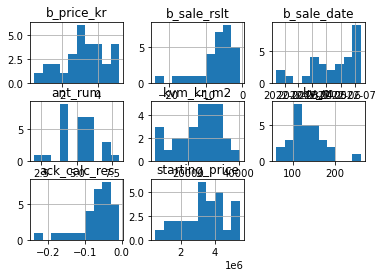

In [230]:
low_profit_sales.hist()

### Slutsats

- Huspriset har gått upp med 3,47% perioden ?
- Skillnad i startpris på big profit / low profit är : kkk kr
- 